In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import pickle


In [3]:
df=pd.read_csv(r"C:\Users\shashank agarwal\Downloads\weatherAUS.csv")  

In [4]:
df.head(4)  

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No


In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [6]:
df.isnull().sum()


Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [7]:
from sklearn.impute import KNNImputer


In [8]:
KNN=KNNImputer(n_neighbors=3)
KNNIMP=pd.DataFrame(KNN.fit_transform(df[["MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am" ,
"WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm"]]))
KNNIMP

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,13.4,22.9,0.6,15.733333,0.500000,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.666667,16.9,21.8
1,7.4,25.1,0.0,4.800000,10.066667,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,0.666667,1.333333,17.2,24.3
2,12.9,25.7,0.0,5.733333,11.666667,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,3.000000,2.000000,21.0,23.2
3,9.2,28.0,0.0,5.133333,10.866667,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,1.333333,0.666667,18.1,26.5
4,17.5,32.3,1.0,3.133333,8.833333,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.4,0.0,2.866667,9.500000,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,1.333333,0.333333,10.1,22.4
8421,3.6,25.3,0.0,3.066667,9.900000,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,2.333333,0.666667,10.9,24.5
8422,5.4,26.9,0.0,3.466667,12.033333,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,3.666667,4.000000,12.5,26.1
8423,7.8,27.0,0.0,3.600000,9.466667,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0


In [9]:
df[["MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am" ,
"WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm"]]=KNNIMP

In [10]:
df



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,15.733333,0.500000,W,44.000000,W,...,71.0,22.0,1007.7,1007.1,8.000000,5.666667,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.800000,10.066667,WNW,44.000000,NNW,...,44.0,25.0,1010.6,1007.8,0.666667,1.333333,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.733333,11.666667,WSW,46.000000,W,...,38.0,30.0,1007.6,1008.7,3.000000,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.133333,10.866667,NE,24.000000,SE,...,45.0,16.0,1017.6,1012.8,1.333333,0.666667,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,3.133333,8.833333,W,41.000000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,2.866667,9.500000,E,31.000000,SE,...,51.0,24.0,1024.6,1020.3,1.333333,0.333333,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,3.066667,9.900000,NNW,22.000000,SE,...,56.0,21.0,1023.5,1019.1,2.333333,0.666667,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,3.466667,12.033333,N,37.000000,SE,...,53.0,24.0,1021.0,1016.8,3.666667,4.000000,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,3.600000,9.466667,SE,28.000000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


In [11]:
df=df.dropna(axis=0)

In [12]:
#from sklearn.preprocessing import LabelEncoder
#lb=LabelEncoder()
#dg=lb.fit_transform(df["RainToday"])
#df["RainToday"]=dg

#lb=LabelEncoder()
#dg2=lb.fit_transform(df["RainTomorrow"])
#df["RainTomorrow"]=dg2
#data=df[["RainToday","RainTomorrow","WindGustDir","WindDir9am","WindDir3pm","Location"]]
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [13]:
#data=data.apply(LabelEncoder().fit_transform)
from sklearn.preprocessing import LabelEncoder
df.shape

(6716, 23)

In [14]:
data=df[["RainToday","RainTomorrow","WindGustDir","WindDir9am","WindDir3pm","Location"]]
data=data.apply(LabelEncoder().fit_transform)
df[["RainToday","RainTomorrow","WindGustDir","WindDir9am","WindDir3pm","Location"]]=data
df.head()

C:\Users\shashank agarwal\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1,13.4,22.9,0.6,15.733333,0.500000,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,5.666667,16.9,21.8,0,0
1,2008-12-02,1,7.4,25.1,0.0,4.800000,10.066667,14,44.0,6,...,44.0,25.0,1010.6,1007.8,0.666667,1.333333,17.2,24.3,0,0
2,2008-12-03,1,12.9,25.7,0.0,5.733333,11.666667,15,46.0,13,...,38.0,30.0,1007.6,1008.7,3.000000,2.000000,21.0,23.2,0,0
3,2008-12-04,1,9.2,28.0,0.0,5.133333,10.866667,4,24.0,9,...,45.0,16.0,1017.6,1012.8,1.333333,0.666667,18.1,26.5,0,0
4,2008-12-05,1,17.5,32.3,1.0,3.133333,8.833333,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


In [15]:
df.drop(columns=["Date"],inplace=True)

C:\Users\shashank agarwal\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
df.head(20)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,15.733333,0.500000,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,5.666667,16.9,21.8,0,0
1,1,7.4,25.1,0.0,4.800000,10.066667,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,0.666667,1.333333,17.2,24.3,0,0
2,1,12.9,25.7,0.0,5.733333,11.666667,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,3.000000,2.000000,21.0,23.2,0,0
3,1,9.2,28.0,0.0,5.133333,10.866667,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,1.333333,0.666667,18.1,26.5,0,0
4,1,17.5,32.3,1.0,3.133333,8.833333,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
5,1,14.6,29.7,0.2,7.400000,7.733333,14,56.0,13,13,...,55.0,23.0,1009.2,1005.4,3.000000,4.666667,20.6,28.9,0,0
6,1,14.3,25.0,0.0,4.133333,9.033333,13,50.0,12,13,...,49.0,19.0,1009.6,1008.2,1.000000,1.333333,18.1,24.6,0,0
7,1,7.7,26.7,0.0,5.400000,9.666667,13,35.0,10,13,...,48.0,19.0,1013.4,1010.1,2.000000,2.333333,16.3,25.5,0,0
8,1,9.7,31.9,0.0,9.333333,10.633333,6,80.0,9,7,...,42.0,9.0,1008.9,1003.6,2.333333,1.333333,18.3,30.2,0,1
9,1,13.1,30.1,1.4,4.533333,10.566667,13,28.0,8,10,...,58.0,27.0,1007.0,1005.7,2.000000,4.000000,20.1,28.2,1,0


In [17]:
print(df.isnull().sum())
print(df.shape)

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64
(6716, 22)


In [18]:
# The dataset is good and can be used to work 

C:\Users\shashank agarwal\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\shashank agarwal\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


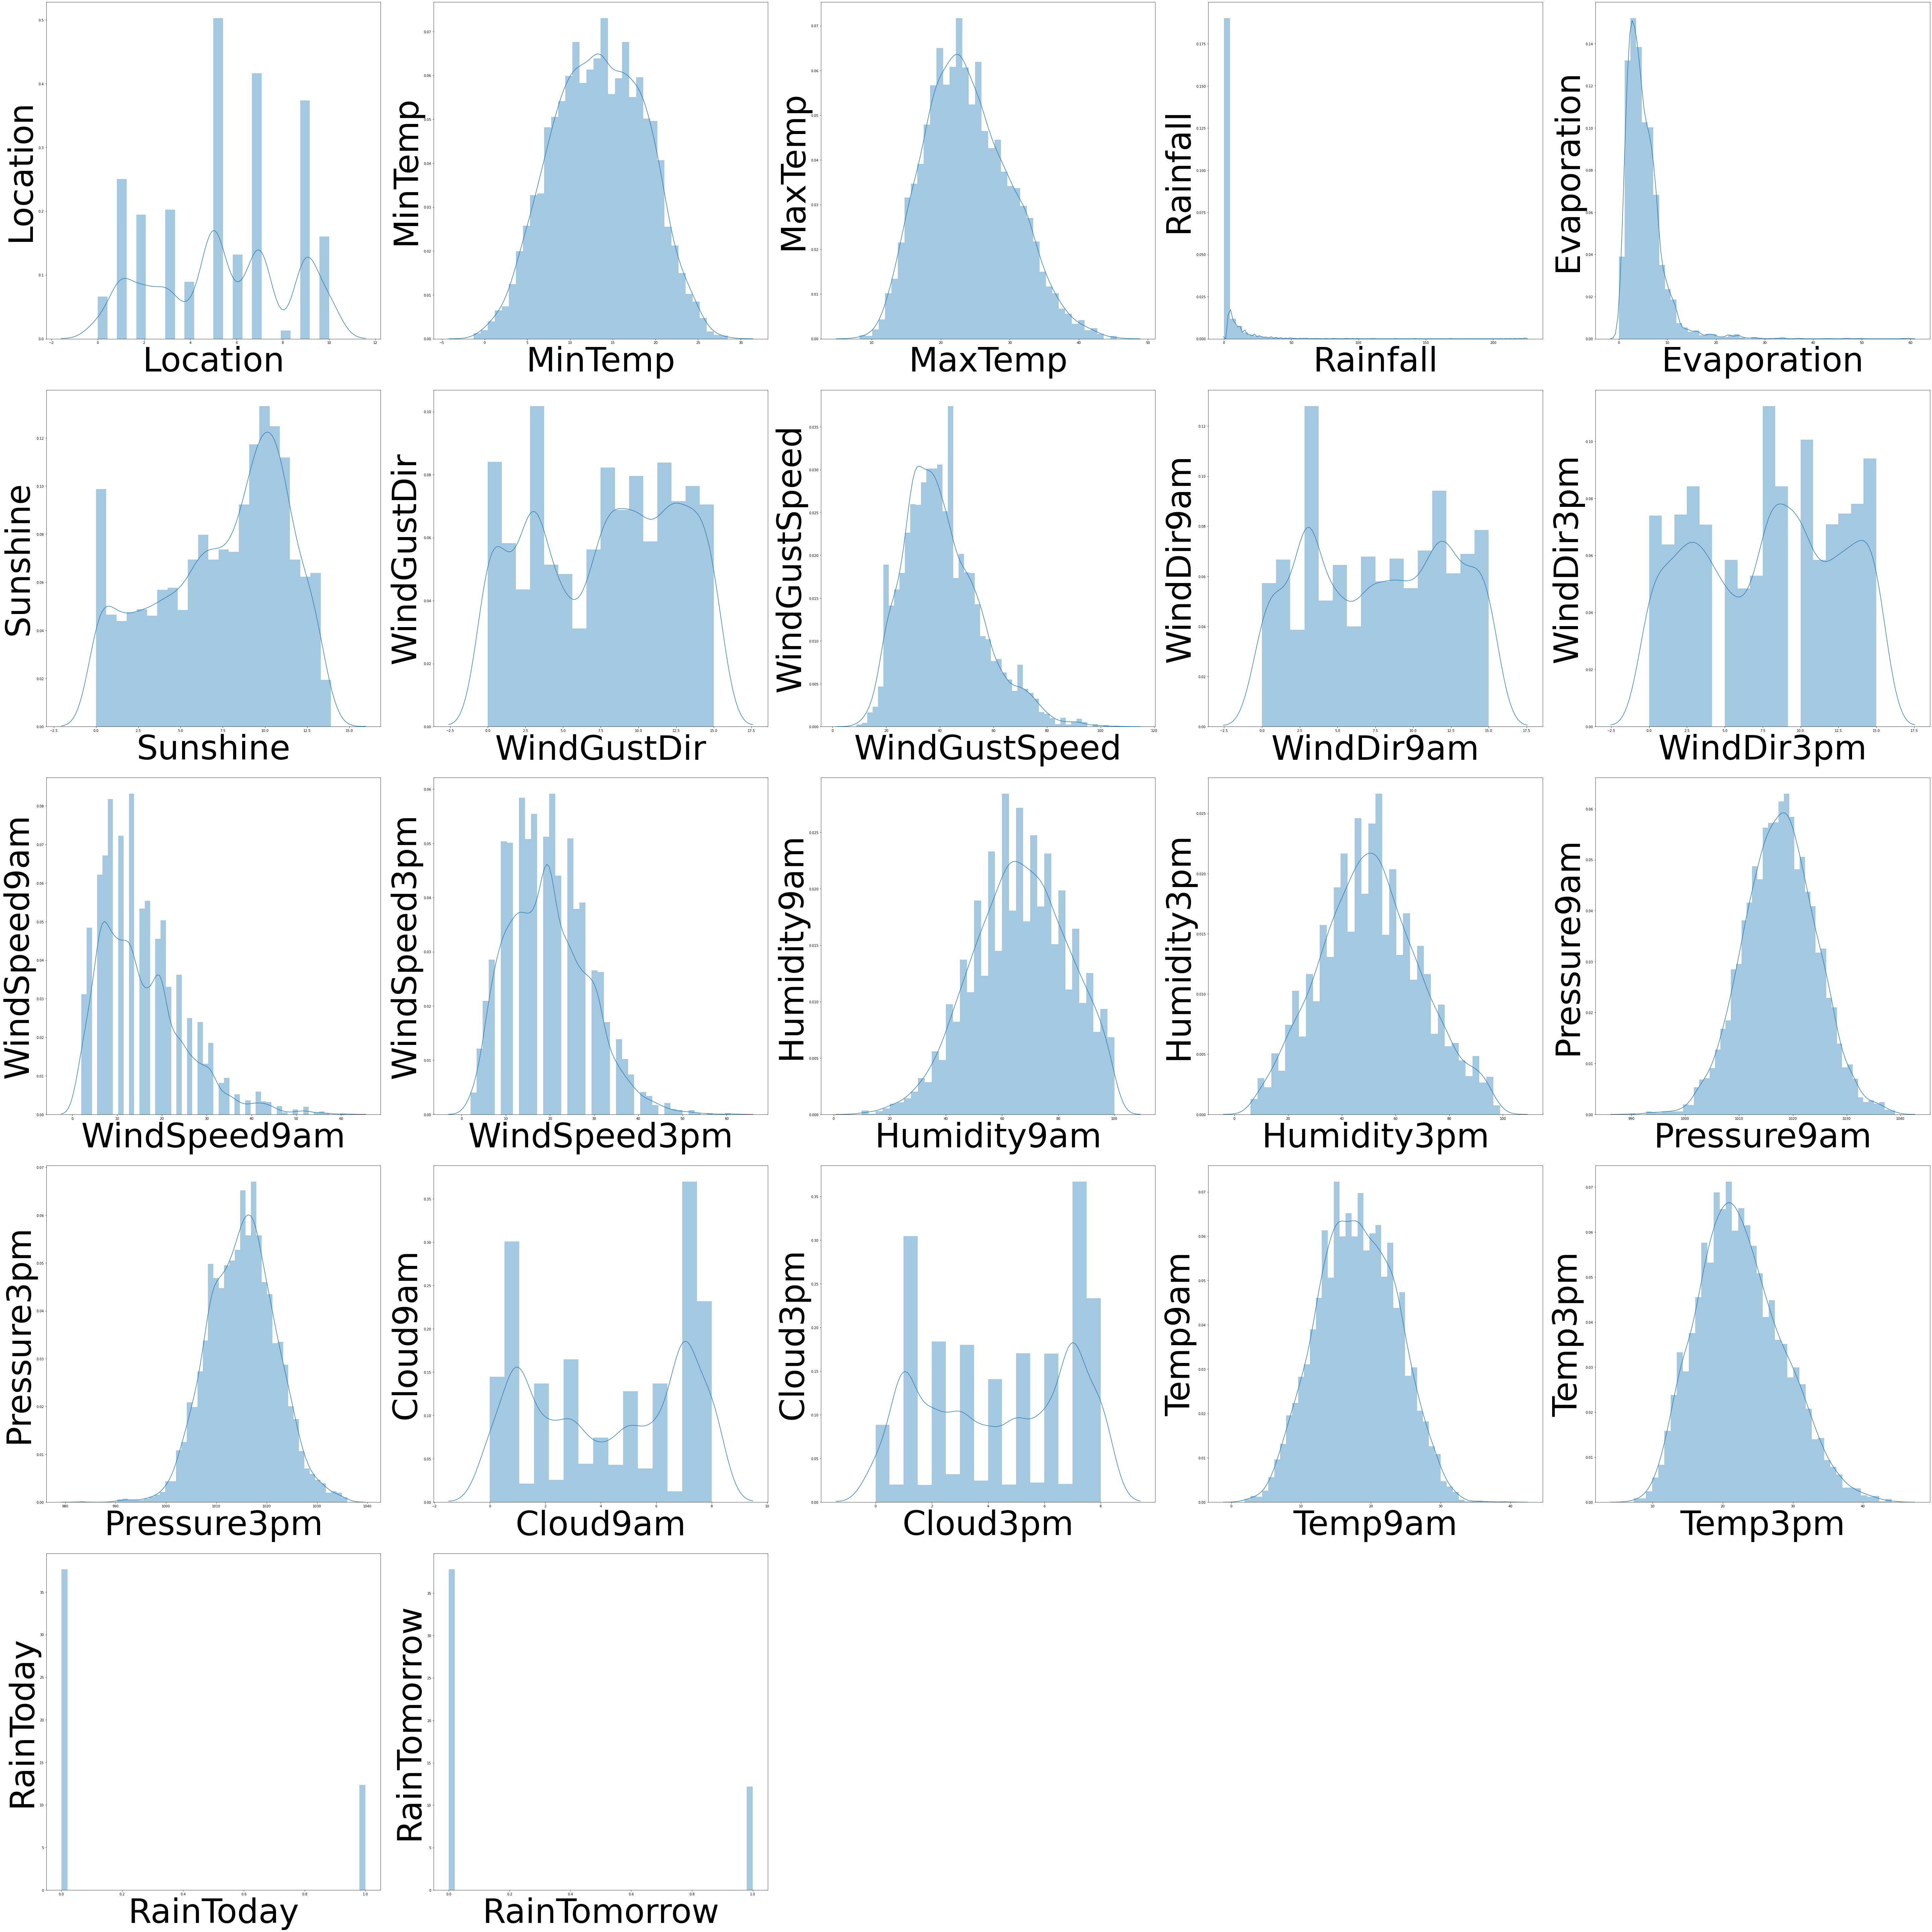

In [19]:
plt.figure(figsize=(80,80))
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=100)
        plt.ylabel(column,fontsize=100)
    plotnumber+=1
plt.tight_layout()

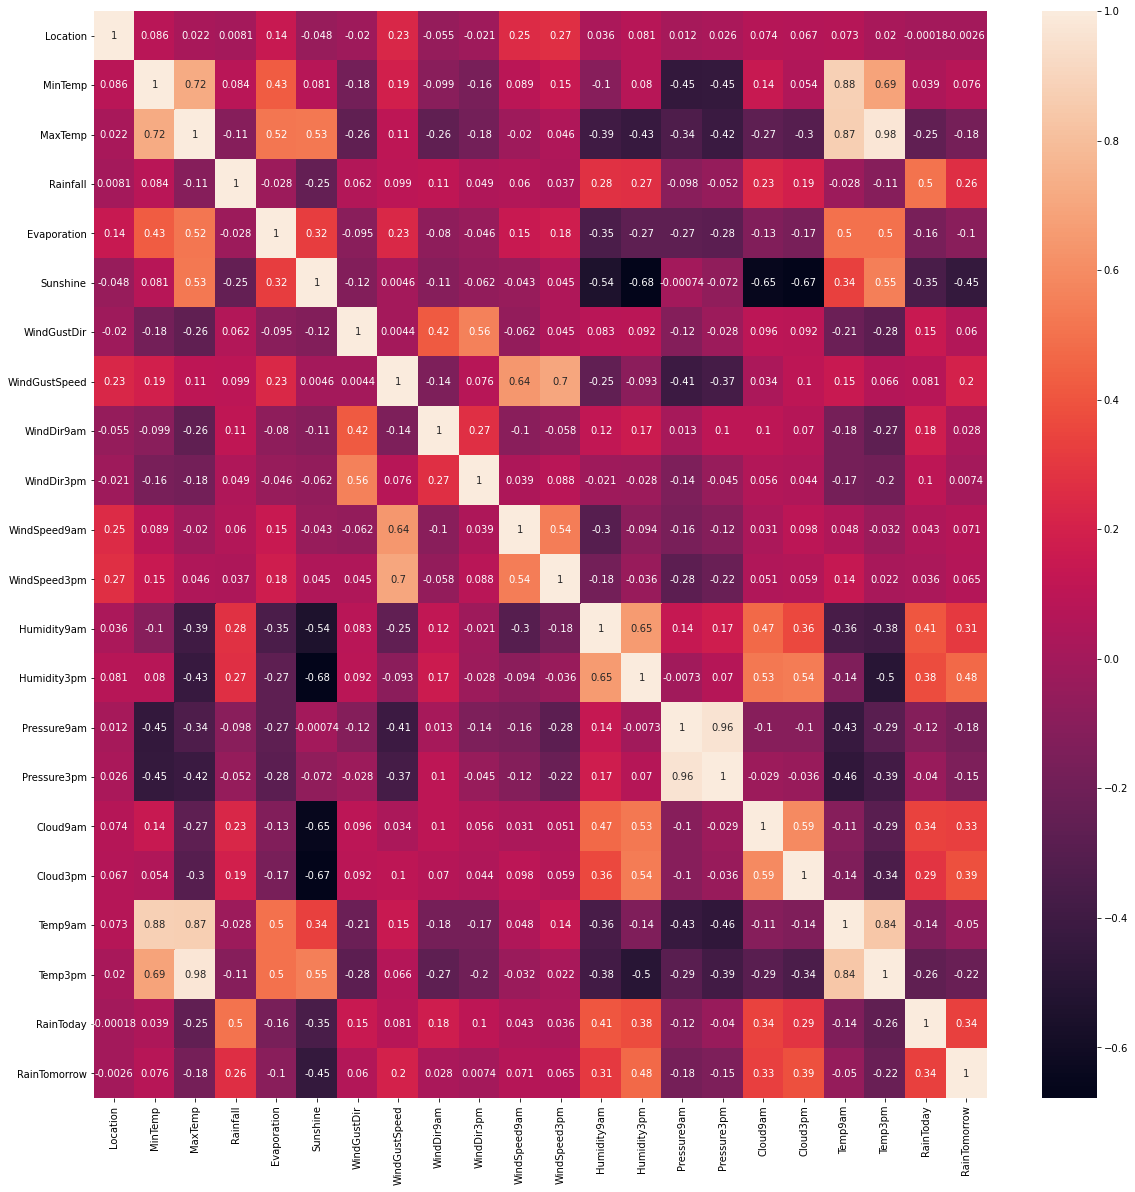

In [20]:
corr=df.corr()
corr.shape

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

In [21]:
df.drop(columns=["MaxTemp","Temp9am"],inplace=True)

C:\Users\shashank agarwal\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


C:\Users\shashank agarwal\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\shashank agarwal\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


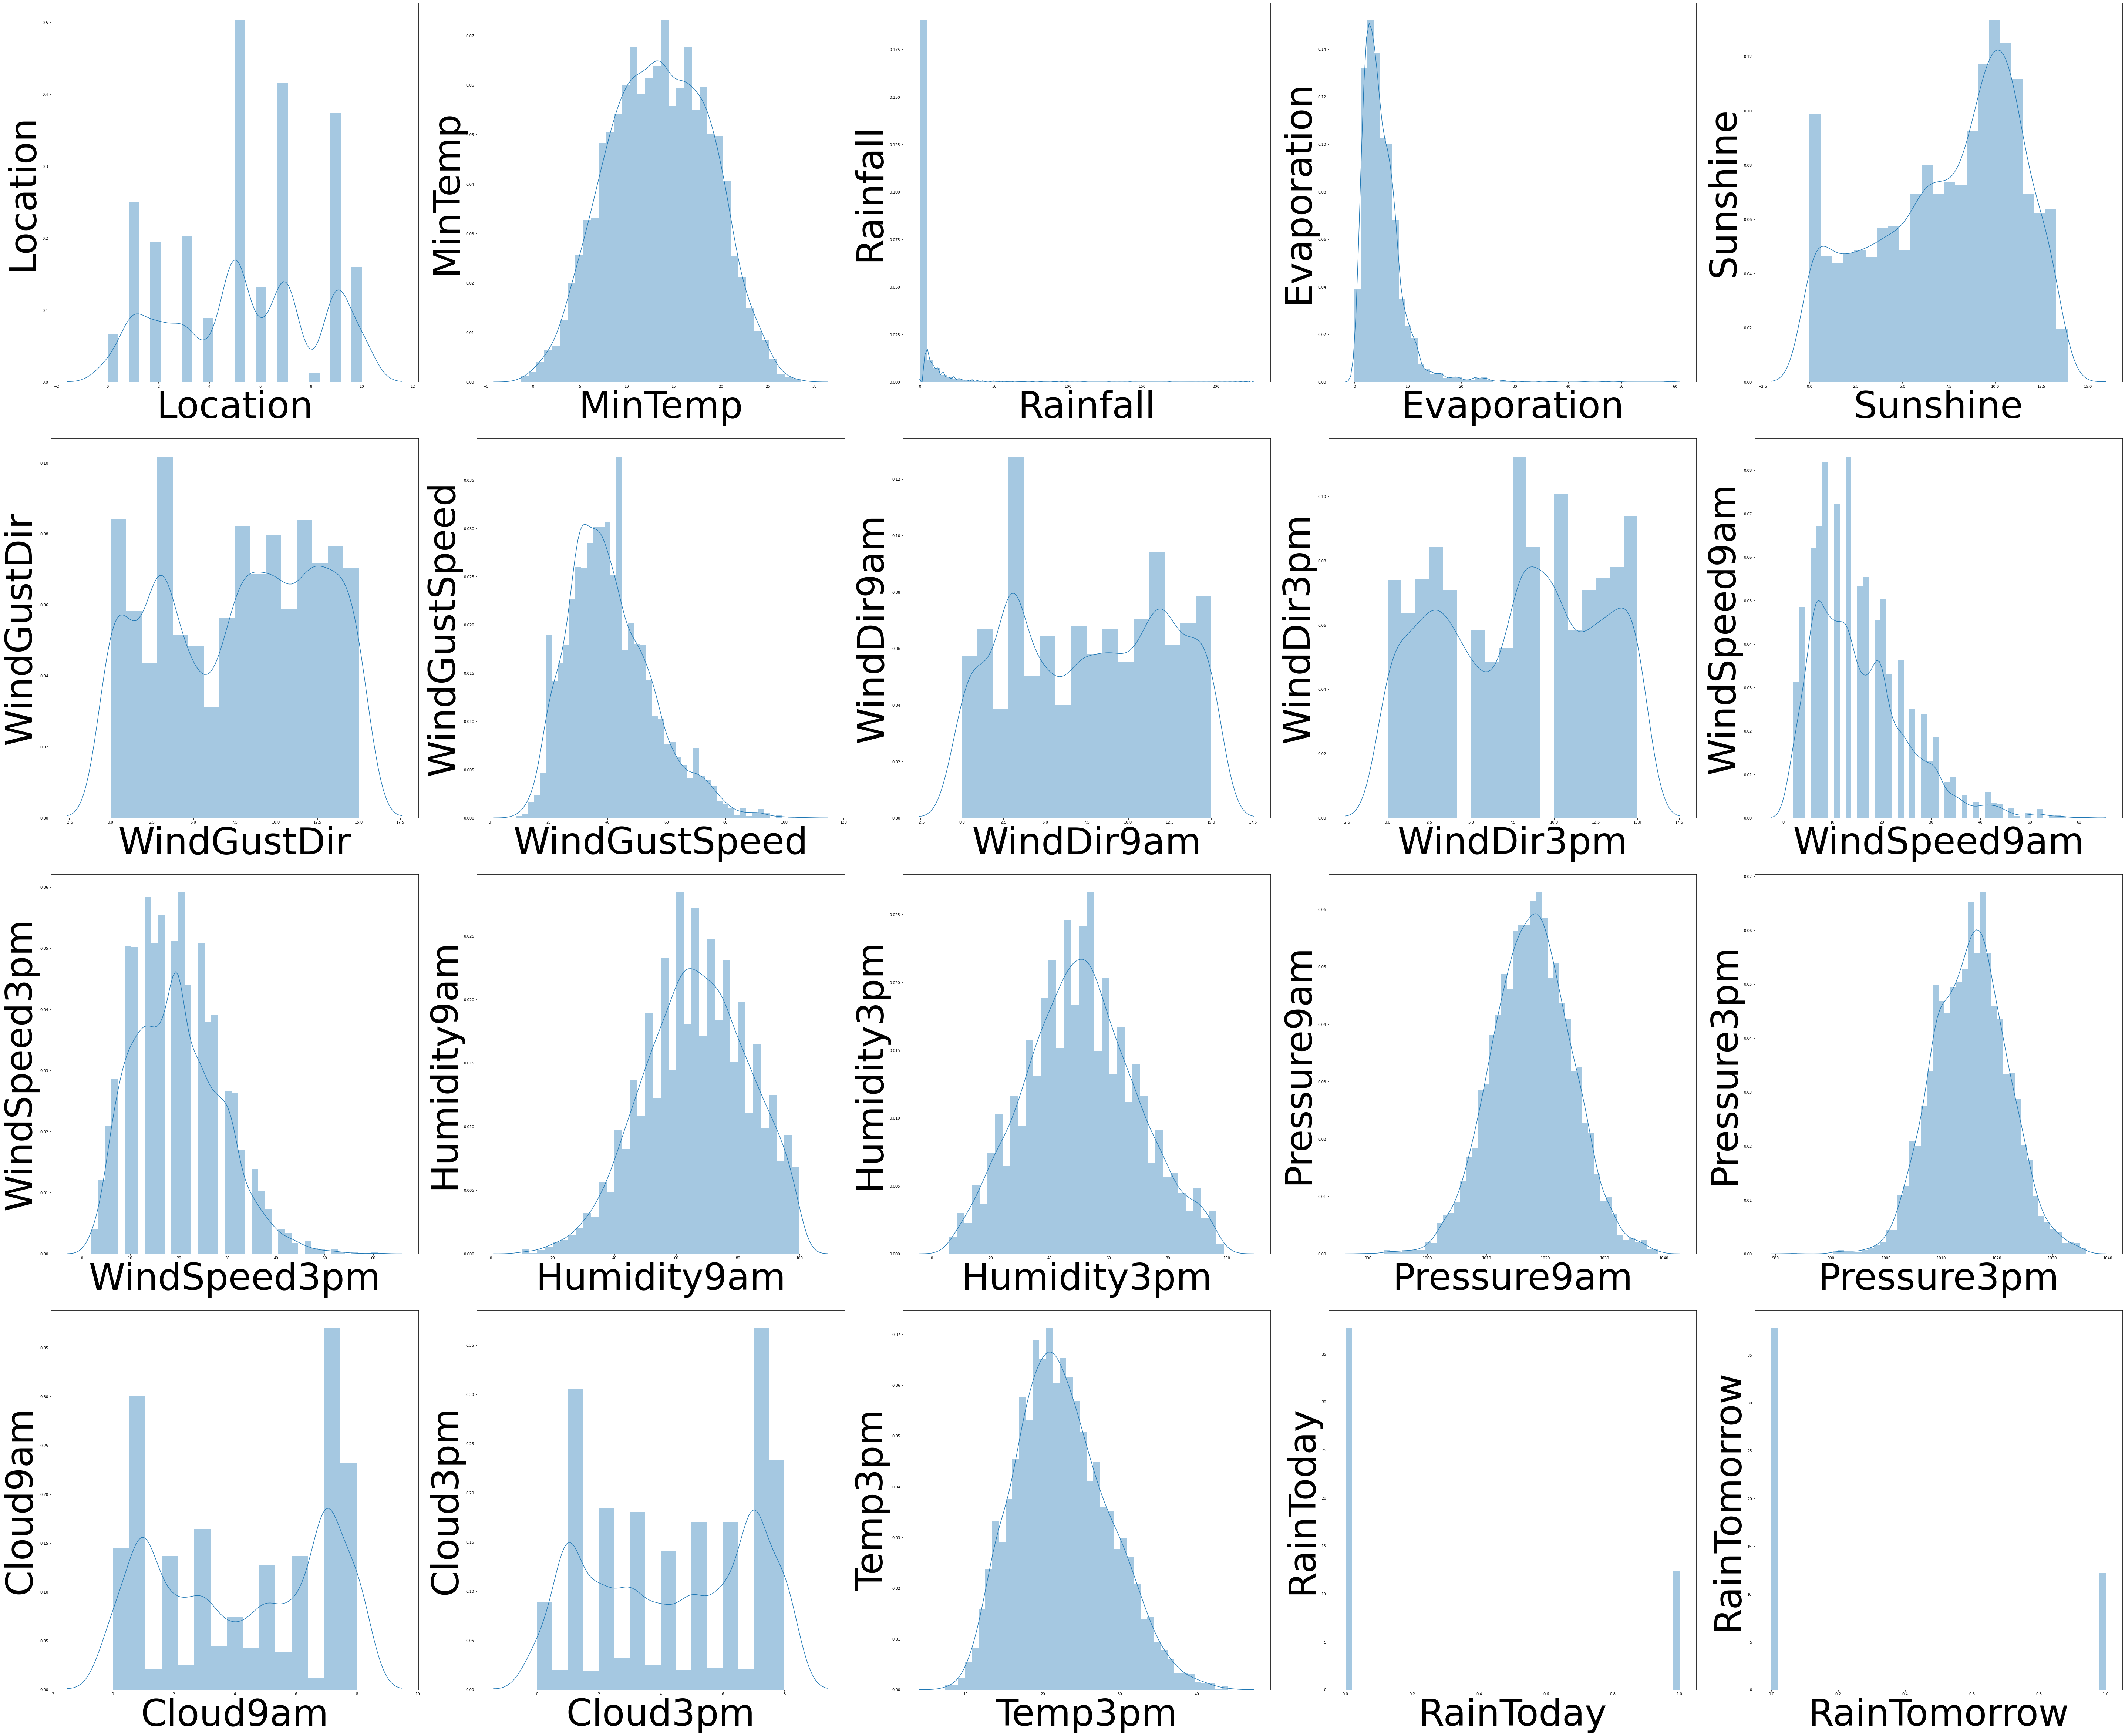

In [22]:
plt.figure(figsize=(80,80))
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=100)
        plt.ylabel(column,fontsize=100)
    plotnumber+=1
plt.tight_layout()

# Lets start with 1st model , that is Rainfall tomorrow or not ....

In [106]:
from imblearn.over_sampling import SMOTE
from collections import Counter



In [107]:

x=df.drop("RainTomorrow",axis=1)
y=df.RainTomorrow
y

0       0
1       0
2       0
3       0
4       0
       ..
8419    0
8420    0
8421    0
8422    0
8423    0
Name: RainTomorrow, Length: 6716, dtype: int32

In [108]:
from sklearn.feature_selection import SelectKBest,f_classif

best_features=SelectKBest(score_func=f_classif,k=1)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=["Column_names","Scores_obtained"]
print(feature_scores.nlargest(18,"Scores_obtained"))

     Column_names  Scores_obtained
12    Humidity3pm      1959.741818
4        Sunshine      1677.091635
16       Cloud3pm      1204.420890
18      RainToday       859.542827
15       Cloud9am       793.981427
11    Humidity9am       713.625157
2        Rainfall       489.449031
17        Temp3pm       339.916468
6   WindGustSpeed       284.355671
13    Pressure9am       219.625676
14    Pressure3pm       149.018625
3     Evaporation        67.662938
1         MinTemp        39.072594
9    WindSpeed9am        33.697505
10   WindSpeed3pm        28.149811
5     WindGustDir        24.354724
7      WindDir9am         5.197732
8      WindDir3pm         0.368327


In [110]:
data=df[["Humidity3pm",      
        "Sunshine",      
       "Cloud3pm",
         "RainToday",     
       "Cloud9am",      
    "Humidity9am",      
       "Rainfall",       
        "Temp3pm",       
  "WindGustSpeed",       
    "Pressure9am",       
   "Pressure3pm",       
    "Evaporation",        
         "MinTemp",        
    "WindSpeed9am",        
   "WindSpeed3pm",        
     "WindGustDir",        
      "WindDir9am",         
        "WindDir3pm"         
       ]]

In [111]:
data

,Humidity3pm,Sunshine,Cloud3pm,RainToday,Cloud9am,Humidity9am,Rainfall,Temp3pm,WindGustSpeed,Pressure9am,Pressure3pm,Evaporation,MinTemp,WindSpeed9am,WindSpeed3pm,WindGustDir,WindDir9am,WindDir3pm
0,22.0,0.500000,5.666667,0,8.000000,71.0,0.6,21.8,44.0,1007.7,1007.1,15.733333,13.4,20.0,24.0,13,13,14
1,25.0,10.066667,1.333333,0,0.666667,44.0,0.0,24.3,44.0,1010.6,1007.8,4.800000,7.4,4.0,22.0,14,6,15
2,30.0,11.666667,2.000000,0,3.000000,38.0,0.0,23.2,46.0,1007.6,1008.7,5.733333,12.9,19.0,26.0,15,13,15
3,16.0,10.866667,0.666667,0,1.333333,45.0,0.0,26.5,24.0,1017.6,1012.8,5.133333,9.2,11.0,9.0,4,9,0
4,33.0,8.833333,8.000000,0,7.000000,82.0,1.0,29.7,41.0,1010.8,1006.0,3.133333,17.5,7.0,20.0,13,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,27.0,9.500000,2.666667,0,0.666667,59.0,0.0,20.9,31.0,1024.7,1021.2,1.933333,3.5,15.0,13.0,0,2,0
8420,24.0,9.500000,0.333333,0,1.333333,51.0,0.0,22.4,31.0,1024.6,1020.3,2.866667,2.8,13.0,11.0,0,9,1
8421,21.0,9.900000,0.666667,0,2.333333,56.0,0.0,24.5,22.0,1023.5,1019.1,3.066667,3.6,13.0,9.0,6,9,3
8422,24.0,12.033333,4.000000,0,3.666667,53.0,0.0,26.1,37.0,1021.0,1016.8,3.466667,5.4,9.0,9.0,3,9,14


In [112]:
x=data
y=df.RainTomorrow
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

In [113]:
oversample = SMOTE()
x,y = oversample.fit_resample(x, y)

In [114]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)
from time import time 
knn=KNeighborsClassifier()
start=time()
knn.fit(x_train,y_train)
print("Training Time :",time()-start)

start=time()
y_pred=knn.predict(x_test)
print("Testing Time:",time()-start)

Training Time : 0.015998125076293945
Testing Time: 2.479271173477173


In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      1280
           1       0.83      0.95      0.89      1259

    accuracy                           0.88      2539
   macro avg       0.89      0.88      0.88      2539
weighted avg       0.89      0.88      0.88      2539



In [120]:
# A good accuracy of 88% has been achieved.
from sklearn.model_selection import cross_val_score

In [121]:
cross_val_score(knn,x,y,cv=10).mean() #The model is not overfititng the data .

0.8636113804739924

In [127]:
from sklearn.model_selection import GridSearchCV
param_grid={"algorithm" : ["kd_tree","brute"],
           "leaf_size" : range(4,8),
           "n_neighbors" : [3,4,5,6,7]} 

gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid,cv=5,n_jobs=-1)

In [128]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': range(4, 8),
                         'n_neighbors': [3, 4, 5, 6, 7]})

In [129]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 4, 'n_neighbors': 4}

In [130]:
from time import time 
knn=KNeighborsClassifier(algorithm='kd_tree', leaf_size=4, n_neighbors=4)

start=time()
knn.fit(x_train,y_train)
print("Training Time :",time()-start)

start=time()
y_pred=knn.predict(x_test)
print("Testing Time:",time()-start)

Training Time : 0.24102044105529785
Testing Time: 1.3270471096038818


In [131]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1280
           1       0.87      0.93      0.90      1259

    accuracy                           0.90      2539
   macro avg       0.90      0.90      0.90      2539
weighted avg       0.90      0.90      0.90      2539



In [132]:
## lets check other alforithms as well

In [133]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

start=time()
dt.fit(x_train,y_train)
print("Training Time :",time()-start)

start=time()
y_pred=dt.predict(x_test)
print("Testing Time:",time()-start)


Training Time : 0.6454131603240967
Testing Time: 0.029183387756347656


In [134]:
confusion_matrix(y_test,y_pred)

array([[1132,  148],
       [ 135, 1124]], dtype=int64)

In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1280
           1       0.88      0.89      0.89      1259

    accuracy                           0.89      2539
   macro avg       0.89      0.89      0.89      2539
weighted avg       0.89      0.89      0.89      2539



In [137]:
cross_val_score(dt,x,y,cv=8).mean()

0.8644937888969553

In [138]:
param_grid={"max_depth": range(10,12),
           "min_samples_leaf": range(2,4),
           "min_samples_split": range(3,6)} 

gridsearch=GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,n_jobs=-1)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 12),
                         'min_samples_leaf': range(2, 4),
                         'min_samples_split': range(3, 6)})

In [139]:
gridsearch.best_params_

{'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [140]:
dt=DecisionTreeClassifier(max_depth=11,min_samples_leaf=2,min_samples_split=4)

start=time()
dt.fit(x_train,y_train)
print("Training Time :",time()-start)

start=time()
y_pred=dt.predict(x_test)
print("Testing Time:",time()-start)

Training Time : 0.2908494472503662
Testing Time: 0.0


In [141]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1280
           1       0.86      0.86      0.86      1259

    accuracy                           0.86      2539
   macro avg       0.86      0.86      0.86      2539
weighted avg       0.86      0.86      0.86      2539



In [142]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()  
start=time()
dt.fit(x_train,y_train)
print("Training Time :",time()-start)

start=time()
y_pred=dt.predict(x_test)
print("Testing Time:",time()-start)

Training Time : 0.43906378746032715
Testing Time: 0.015630006790161133


In [144]:
confusion_matrix(y_test,y_pred)

array([[1111,  169],
       [ 192, 1067]], dtype=int64)

In [145]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1280
           1       0.86      0.85      0.86      1259

    accuracy                           0.86      2539
   macro avg       0.86      0.86      0.86      2539
weighted avg       0.86      0.86      0.86      2539



In [147]:
cross_val_score(ad,x,y,cv=10).mean()

0.7969504673984718

In [148]:
## The model is overfitting the results , so probably not the bes algorith for the same , lets try gradient booster .

In [149]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt_cl=GradientBoostingClassifier()

start=time()
gbdt_cl.fit(x_train,y_train)
print("Training Time :",time()-start)

start=time()
y_pred=gbdt_cl.predict(x_test)
print("Testing Time:",time()-start)

Training Time : 17.809648990631104
Testing Time: 0.3520379066467285


In [150]:
print(confusion_matrix(y_test,y_pred))

[[1108  172]
 [ 197 1062]]


In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1280
           1       0.86      0.84      0.85      1259

    accuracy                           0.85      2539
   macro avg       0.85      0.85      0.85      2539
weighted avg       0.85      0.85      0.85      2539



In [154]:
cross_val_score(gbdt_cl,x,y,cv=8).mean()

0.8368207963366281

In [155]:
param_grid={"max_depth": range(10,12),
           "min_samples_leaf": range(2,4),
           "min_samples_split": range(3,6)} 

gridsearch=GridSearchCV(estimator=gbdt_cl,param_grid=param_grid,cv=5,n_jobs=-1)
gridsearch.fit(x_train,y_train) 

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 12),
                         'min_samples_leaf': range(2, 4),
                         'min_samples_split': range(3, 6)})

In [157]:
gridsearch.best_params_

{'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 5}

In [158]:
gbdt_cl=GradientBoostingClassifier(max_depth=11, min_samples_leaf=3, min_samples_split=5)

start=time()
gbdt_cl.fit(x_train,y_train)
print("Training Time :",time()-start)

start=time()
y_pred=gbdt_cl.predict(x_test)
print("Testing Time:",time()-start)

Training Time : 44.05345153808594
Testing Time: 0.9144988059997559


In [159]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1280
           1       0.94      0.94      0.94      1259

    accuracy                           0.94      2539
   macro avg       0.94      0.94      0.94      2539
weighted avg       0.94      0.94      0.94      2539



In [160]:
# Hence the best model is gradient boosting , giving an accuray of 94%

In [161]:
import pickle
final_model="rain.pickle"
pickle.dump(gbdt_cl,open(final_model,'wb'))

# Model for Amount of rainfall....

In [42]:
df.shape

(6716, 20)

In [43]:
x=df.drop("Rainfall",axis=1)
y=df.Rainfall

In [44]:
from sklearn.feature_selection import SelectKBest,f_classif

best_features=SelectKBest(score_func=f_classif,k=16)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=["Column_names","Scores_obtained"]
print(feature_scores.nlargest(16,"Scores_obtained"))

     Column_names  Scores_obtained
17      RainToday              inf
10    Humidity9am         8.695470
11    Humidity3pm         7.723090
3        Sunshine         7.144617
18   RainTomorrow         6.892820
14       Cloud9am         5.863632
15       Cloud3pm         4.571237
16        Temp3pm         3.798311
2     Evaporation         3.475406
6      WindDir9am         2.575581
12    Pressure9am         2.542363
4     WindGustDir         2.161486
5   WindGustSpeed         2.011230
13    Pressure3pm         2.011151
9    WindSpeed3pm         1.695573
7      WindDir3pm         1.598014


C:\Users\shashank agarwal\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [45]:
data=df[["RainToday","Humidity9am","Humidity3pm","Sunshine","RainTomorrow","Cloud9am","Cloud3pm","Evaporation","WindDir9am",
        "Pressure9am","WindGustDir","WindGustSpeed","Pressure3pm","WindSpeed3pm","WindDir3pm"]]

In [46]:
data.head(10)

,RainToday,Humidity9am,Humidity3pm,Sunshine,RainTomorrow,Cloud9am,Cloud3pm,Evaporation,WindDir9am,Pressure9am,WindGustDir,WindGustSpeed,Pressure3pm,WindSpeed3pm,WindDir3pm
0,0,71.0,22.0,0.500000,0,8.000000,5.666667,15.733333,13,1007.7,13,44.0,1007.1,24.0,14
1,0,44.0,25.0,10.066667,0,0.666667,1.333333,4.800000,6,1010.6,14,44.0,1007.8,22.0,15
2,0,38.0,30.0,11.666667,0,3.000000,2.000000,5.733333,13,1007.6,15,46.0,1008.7,26.0,15
3,0,45.0,16.0,10.866667,0,1.333333,0.666667,5.133333,9,1017.6,4,24.0,1012.8,9.0,0
4,0,82.0,33.0,8.833333,0,7.000000,8.000000,3.133333,1,1010.8,13,41.0,1006.0,20.0,7
5,0,55.0,23.0,7.733333,0,3.000000,4.666667,7.400000,13,1009.2,14,56.0,1005.4,24.0,13
6,0,49.0,19.0,9.033333,0,1.000000,1.333333,4.133333,12,1009.6,13,50.0,1008.2,24.0,13
7,0,48.0,19.0,9.666667,0,2.000000,2.333333,5.400000,10,1013.4,13,35.0,1010.1,17.0,13
8,0,42.0,9.0,10.633333,1,2.333333,1.333333,9.333333,9,1008.9,6,80.0,1003.6,28.0,7
9,1,58.0,27.0,10.566667,0,2.000000,4.000000,4.533333,8,1007.0,13,28.0,1005.7,11.0,10


In [47]:
x=data


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

In [39]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

y_pred=lm.predict(x_test)

print(lm.score(x_train,y_train))
print(lm.score(x_test,y_test))

0.2845735175843398
0.2685783007998198


In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(lm,x,y,cv=10).mean()


0.29457656057812537

In [34]:
# Lets try to achieve more accuracy, by using different algorithms

In [35]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)

y_pred=knr.predict(x_test)

print("training accuracy:",knr.score(x_train,y_train))
print("Testing accuracy:",knr.score(x_test,y_test))

training accuracy: 0.5206596501292116
Testing accuracy: 0.30174711908544616


In [36]:
cross_val_score(knr,x,y,cv=10).mean()

0.2643785594355615

In [37]:
#  The accuracy is very less , so it is pointless to do hyperparameter tuning 

In [38]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

y_pred=dtr.predict(x_test)

print("training score",dtr.score(x_train,y_train))
print("testing score",dtr.score(x_test,y_test))

training score 1.0
testing score 0.3430606336845886


In [50]:
from sklearn.model_selection import GridSearchCV

param_grid={"max_depth":range(10,20),
           "min_samples_leaf":range(2,7),
           "min_samples_split":range(2,6)}

grid_search=GridSearchCV(estimator=dtr,param_grid=param_grid,cv=5,n_jobs=-1) 
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(10, 20),
                         'min_samples_leaf': range(2, 7),
                         'min_samples_split': range(2, 6)})

In [51]:
grid_search.best_params_

{'max_depth': 11, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [52]:
dtr=DecisionTreeRegressor(max_depth=11,min_samples_leaf=6,min_samples_split=2)
dtr.fit(x_train,y_train)

y_pred=dtr.predict(x_test)

print("training score",dtr.score(x_train,y_train))
print("testing score",dtr.score(x_test,y_test))

training score 0.6049824790545344
testing score 0.37733251052089745


In [54]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()

rfr.fit(x_train,y_train)

y_pred=rfr.predict(x_test)

print("Training score:",rfr.score(x_train,y_train))
print("Testing Score:",rfr.score(x_test,y_test))

Training score: 0.9262807300118681
Testing Score: 0.6855303215078818


In [55]:
cross_val_score(rfr,x,y,cv=8).mean()

0.48344780527866177

In [61]:
param_grid={"max_depth":range(2,6),
           "min_samples_leaf":range(3,7),
           "min_samples_split":range(4,6)
           }

In [62]:
grid_search=GridSearchCV(rfr,param_grid=param_grid)

grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(max_depth=3, min_samples_leaf=2,
                                             min_samples_split=5),
             param_grid={'max_depth': range(2, 6),
                         'min_samples_leaf': range(3, 7),
                         'min_samples_split': range(4, 6)})

In [63]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 4}

In [64]:
rfr= RandomForestRegressor(max_depth=3,min_samples_leaf=2,min_samples_split=5)

rfr.fit(x_train,y_train)

y_pred=rfr.predict(x_test)

print("Training score:",rfr.score(x_train,y_train))
print("Testing Score:",rfr.score(x_test,y_test))

Training score: 0.4268033631614795
Testing Score: 0.4723131184167879


In [65]:
# The accuracy decreased after the tuning .

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
xbdt=GradientBoostingRegressor()

xbdt.fit(x_train,y_train)
y_pred=xbdt.predict(x_test)

print("Training data:",xbdt.score(x_train,y_train))
print("Testing data:",xbdt.score(x_test,y_test))

Training data: 0.6781796680264593
Testing data: 0.5939470679772181


In [71]:
cross_val_score(xbdt,x,y,cv=5).mean()

0.40023903729019555

In [74]:
param_grid={"max_depth": range(10,12),
           "min_samples_leaf": range(2,4),
           "min_samples_split": range(3,6)} 

gridsearch=GridSearchCV(estimator=xbdt,param_grid=param_grid,cv=5,n_jobs=-1)

gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(10, 12),
                         'min_samples_leaf': range(2, 4),
                         'min_samples_split': range(3, 6)})

In [75]:
gridsearch.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [78]:
gbdt=GradientBoostingRegressor(max_depth= 10, min_samples_leaf= 2, min_samples_split= 5)
gbdt.fit(x_train,y_train)

ypred_=gbdt.predict(x_test)

print("Training data:",xbdt.score(x_train,y_train))
print("Testing data:",xbdt.score(x_test,y_test))

Training data: 0.6781796680264593
Testing data: 0.5939470679772181


In [ ]:
# The best model is this ....

In [80]:
rfr= RandomForestRegressor()

rfr.fit(x_train,y_train)

y_pred=rfr.predict(x_test)

print("Training score:",rfr.score(x_train,y_train))
print("Testing Score:",rfr.score(x_test,y_test))

Training score: 0.9250623803809624
Testing Score: 0.6859881089117903


In [81]:
import pickle 
final_model="Rainfall.pickle"
pickle.dump(rfr,open(final_model,'wb'))